### Lab Tasks
- In the dataframe created in Lab 2 - Part a, set ``Salary`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``MinMaxScaler`` to scale X_train and X_test. 

### Data preprocessing

In [2]:
import pandas as pd
data = pd.read_csv('adult.csv')

In [3]:
data = data[data != ' ?']
l = ['workclass', 'education', 'occupation', 'native-country']
data.drop(l, axis = 1, inplace = True)

In [4]:
df = pd.get_dummies(data['marital-status'])
data = pd.concat([data, df], axis = 1)
data.drop('marital-status', axis = 1, inplace=True)

In [5]:
df = pd.get_dummies(data['relationship'])
data = pd.concat([data, df], axis = 1)
data.drop('relationship', axis = 1, inplace=True)

In [6]:
df = pd.get_dummies(data['race'])
data = pd.concat([data, df], axis = 1)
data.drop('race', axis = 1, inplace=True)

In [7]:
data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [8]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})

In [11]:
y = data['Salary']
X = data.drop(['Salary'], axis = 1)

#### Question 1
Train a ``KNeighborClassifier`` on this dataset. Which value of the hyper parameter ``n_neighbors`` results in an overfitting problem. 

``neighbors = [1, 5, 10, 15, 20]``

#### Question 2
Train a ``LinearSVC`` model on this dataset. Fine tune this model by changing the hyperparameter ``C`` in ``[0.01, 0.1, 1, 10]``. What can we say about this model. (set ``random_state = 0``)

#### Question 3
Consider ``Xt = X_train[['age','education-num']][:100]``, and ``yt = y_train[:100]``. We have the following plots to show decision boundary of ``SVC(kernel = 'rbf')``. Which plot suggest the largest value of C and gamma? 
``C`` and ``gamma`` in ``[0.1, 1, 10]``. ``random_state = 0``

#### Question 4
Train a ``LogisticRegression`` model. Among values ``C`` in ``[0.1, 1, 10]`` and ``penalty`` in ``['l1', 'l2']``, which combination will give the best fit? (set ``random_state = 0``)

#### Question 5
Train a ``DecisionTreeClassifier`` model on this dataset. Which ``max_depth`` in  ``[1, 2, 3, 5, 10]`` is the best fit? (choose the value that both train and test scores are high and gap between train and test score is small. Set ``random_state = 0``). 

#### Question 6
Consider the ``max_depth`` in the previous question. Which feature is the most important feature? 

In [16]:
type(X)

pandas.core.frame.DataFrame

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [18]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [27]:
X_train
X_test

array([[0.1369863 , 0.11194768, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.1369863 , 0.13868054, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.10958904, 0.16569865, 0.73333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.36986301, 0.10507871, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.49315068, 0.16683759, 0.53333333, ..., 0.        , 0.        ,
        1.        ],
       [0.4109589 , 0.07324405, 0.53333333, ..., 0.        , 0.        ,
        1.        ]])

In [30]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in [1, 5, 10, 15, 20]:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
print(train_score_array)
print(test_score_array)

[0.99942414004914, 0.8770730958230958, 0.8569947788697788, 0.8535012285012284, 0.8493550368550369]
[0.7904191616766467, 0.8200522032857362, 0.8271150007676954, 0.831260555811454, 0.833256563795486]


In [28]:
neighbors = [1, 5, 10, 15, 20]

1
5
10
15
20


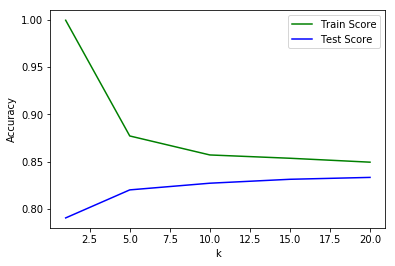

In [37]:
import matplotlib.pyplot as plt
neighbors = [1, 5, 10, 15, 20]
%matplotlib inline
plt.plot(neighbors, train_score_array, label = 'Train Score', c = 'g')
plt.plot(neighbors, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

# SVC

In [39]:
from sklearn.svm import LinearSVC

In [46]:
from sklearn.svm import LinearSVC       
LStrain=[]
LStest=[]

for C in [0.01, 0.1, 1, 10] :
    LS=LinearSVC(C=C)
    LS.fit(X_train, y_train)
    LStrain.append(LS.score(X_train, y_train))
    LStest.append(LS.score(X_test, y_test))
print(LStrain)
print(LStest)

[0.8343826781326781, 0.8423295454545454, 0.8444794226044227, 0.8449785012285013]
[0.8304928604329802, 0.8403193612774451, 0.8413941348073085, 0.8415476738830032]


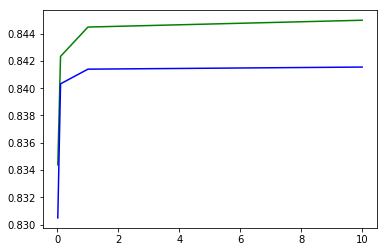

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
C=[0.01, 0.1, 1, 10]
plt.plot(C, LStrain, c = 'g', label = 'Train Score')
plt.plot(C, LStest, c = 'b', label = 'Test Score')

# DECISION TREE


In [49]:
from sklearn.tree import DecisionTreeClassifier